# Computer Pointer Controller - Performance

The aim of this Python Notebook is to compare the app performance on different hardwares and with different model precisions.

Model precisions tested:
- FP32
- FP16
- INT8

Hardwares tested:
- CPU (2.3 GHz Intel Core i5)
- GPU (Intel(R) UHD Graphics 630)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Benchmark results of the model. CPU

In [2]:
CPU_FP16 = pd.read_csv("C:/UdaciteProject/starter/outcomes_CPU/FP16/stats.txt", names =['FP16'])
CPU_FP32 = pd.read_csv("C:/UdaciteProject/starter/outcomes_CPU/FP32/stats.txt", names =['FP32'])
CPU_FP32_INT8 = pd.read_csv("C:/UdaciteProject/starter/outcomes_CPU/INT8/stats.txt", names =['FP32INT8'])

In [3]:
CPU_FP16.rename(index={0:'inference_time',1:'model_load_time',2:'Fps',3:'total_time' }, inplace=True)
CPU_FP32.rename(index={0:'inference_time',1:'model_load_time',2:'Fps',3:'total_time'}, inplace=True)
CPU_FP32_INT8.rename(index={0:'inference_time',1:'model_load_time',2:'Fps',3:'total_time'}, inplace=True)

In [4]:
CPU_FP16,CPU_FP32,CPU_FP32_INT8

(                      FP16
 inference_time   31.800000
 model_load_time   1.165073
 Fps               1.855346
 total_time       31.845105,
                       FP32
 inference_time   31.600000
 model_load_time   0.930308
 Fps               1.867089
 total_time       31.645942,
                   FP32INT8
 inference_time   32.000000
 model_load_time   2.662999
 Fps               1.843750
 total_time       32.022906)

In [5]:
result = pd.concat([CPU_FP16, CPU_FP32,CPU_FP32_INT8], axis=1, join='inner')

In [6]:
result

,FP16,FP32,FP32INT8
inference_time,31.800000,31.600000,32.000000
model_load_time,1.165073,0.930308,2.662999
Fps,1.855346,1.867089,1.843750
total_time,31.845105,31.645942,32.022906


In [7]:
result_transposed = result.T # or df1.transpose()
result_transposed

,inference_time,model_load_time,Fps,total_time
FP16,31.8,1.165073,1.855346,31.845105
FP32,31.6,0.930308,1.867089,31.645942
FP32INT8,32.0,2.662999,1.843750,32.022906


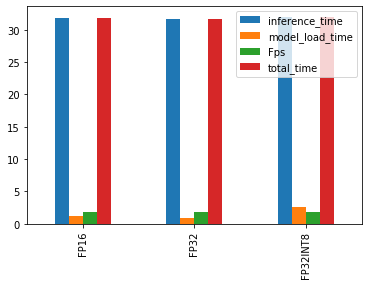

In [8]:
result_transposed.plot.bar();

In [9]:
precision_list = ['FP16', 'FP32', 'FP32-INT8']

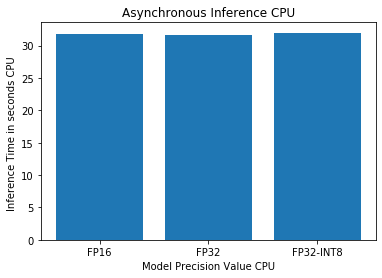

In [10]:
plt.bar([1, 2, 3], result_transposed['inference_time'],tick_label=precision_list)
plt.xlabel('Model Precision Value CPU')
plt.ylabel('Inference Time in seconds CPU ')
plt.title('Asynchronous Inference CPU')
plt.show()

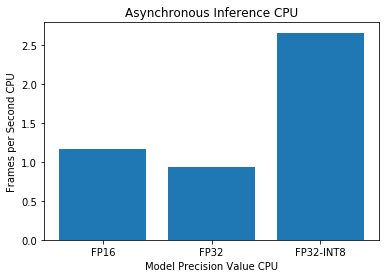

In [11]:
plt.bar([1, 2, 3], result_transposed['model_load_time'],tick_label=precision_list)
plt.xlabel('Model Precision Value CPU')
plt.ylabel('Frames per Second CPU')
plt.title('Asynchronous Inference CPU')
plt.show()

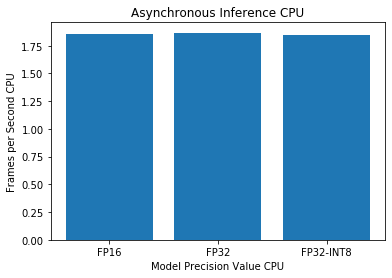

In [12]:
plt.bar([1, 2, 3], result_transposed['Fps'],tick_label=precision_list)
plt.xlabel('Model Precision Value CPU')
plt.ylabel('Frames per Second CPU')
plt.title('Asynchronous Inference CPU')
plt.show()

### Benchmark results of the model. GPU

In [13]:
GPU_FP16 = pd.read_csv("C:/UdaciteProject/starter/outcomes_GPU/FP16/stats.txt", names =['FP16'])
GPU_FP32 = pd.read_csv("C:/UdaciteProject/starter/outcomes_GPU/FP32/stats.txt", names =['FP32'])
GPU_FP32_INT8 = pd.read_csv("C:/UdaciteProject/starter/outcomes_GPU/INT8/stats.txt", names =['FP32INT8'])

In [14]:
GPU_FP16.rename(index={0:'inference_time',1:'model_load_time',2:'Fps',3:'total_time' }, inplace=True)
GPU_FP32.rename(index={0:'inference_time',1:'model_load_time',2:'Fps',3:'total_time'}, inplace=True)
GPU_FP32_INT8.rename(index={0:'inference_time',1:'model_load_time',2:'Fps',3:'total_time'}, inplace=True)

In [15]:
GPU_FP16,GPU_FP32,GPU_FP32_INT8

(                      FP16
 inference_time   32.600000
 model_load_time  34.921903
 Fps               1.809816
 total_time       32.572538,
                       FP32
 inference_time   32.800000
 model_load_time  33.834617
 Fps               1.798780
 total_time       32.822181,
                   FP32INT8
 inference_time   34.100000
 model_load_time  47.700375
 Fps               1.730205
 total_time       34.146677)

In [16]:
result = pd.concat([GPU_FP16, GPU_FP32,GPU_FP32_INT8], axis=1, join='inner')

In [17]:
result

,FP16,FP32,FP32INT8
inference_time,32.600000,32.800000,34.100000
model_load_time,34.921903,33.834617,47.700375
Fps,1.809816,1.798780,1.730205
total_time,32.572538,32.822181,34.146677


In [18]:
result_transposed = result.T # or df1.transpose()
result_transposed

,inference_time,model_load_time,Fps,total_time
FP16,32.6,34.921903,1.809816,32.572538
FP32,32.8,33.834617,1.798780,32.822181
FP32INT8,34.1,47.700375,1.730205,34.146677


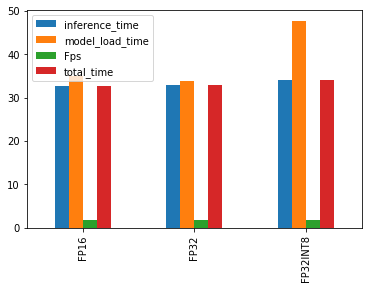

In [19]:
result_transposed.plot.bar();

In [20]:
precision_list = ['FP16', 'FP32', 'FP32-INT8']

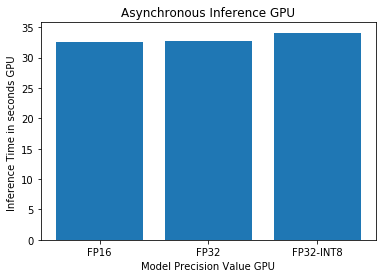

In [21]:
plt.bar([1, 2, 3], result_transposed['inference_time'],tick_label=precision_list)
plt.xlabel('Model Precision Value GPU')
plt.ylabel('Inference Time in seconds GPU ')
plt.title('Asynchronous Inference GPU')
plt.show()

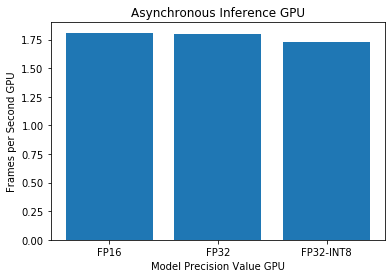

In [22]:
plt.bar([1, 2, 3], result_transposed['Fps'],tick_label=precision_list)
plt.xlabel('Model Precision Value GPU')
plt.ylabel('Frames per Second GPU')
plt.title('Asynchronous Inference GPU')
plt.show()

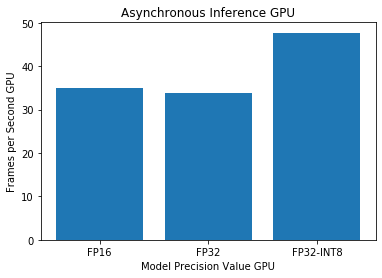

In [23]:
plt.bar([1, 2, 3], result_transposed['model_load_time'],tick_label=precision_list)
plt.xlabel('Model Precision Value GPU')
plt.ylabel('Frames per Second GPU')
plt.title('Asynchronous Inference GPU')
plt.show()